<a href="https://colab.research.google.com/github/Higgins2718/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
5674,47,8800.0,1,89,1.6,3,1,2002,0
6647,14,10600.0,1,5,1.0,3,1,2014,0
4325,49,3750.0,3,305,1.5,3,1,1995,0
197,4,1950.0,4,210,1.8,1,0,1996,0
4410,4,4200.0,3,236,2.5,0,0,2003,1
7685,52,9900.0,2,200,2.5,0,1,2007,1
5902,59,11700.0,4,177,1.5,0,1,2012,0
3070,50,1850.0,3,281,2.0,0,1,1985,2
2600,59,9900.0,0,201,1.9,0,1,2006,1
6875,67,7900.0,3,155,1.6,1,1,2006,0


In [34]:
df.isnull().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
features = ['make', 
            'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'drive']

target = 'price'

X = df[features]
y = df[target]

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)


## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [38]:
print(model.intercept_)

-2269355.0772314165


In [39]:
print(model.coef_)

[  -35.16726588 -1770.98509064   -40.26859658   273.03540784
 -1111.08031708  4535.06013378  1140.73124767  8292.04613874]


## 1.5 Use the test data to make predictions.

In [0]:
y_pred = model.predict(X_test)

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [41]:
# Compare predictions to test target
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('Root Mean Squared Error', rmse)
print('R^2 Score', r2)

Root Mean Squared Error 21394.43524600266
R^2 Score 0.29213322373743256


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
The coefficient corresponding to the `year` feature has a value of approximately 1140.7. `price` has a strong causual relationship with `year`.

In [42]:
pd.Series(model.coef_, features)

make             -35.167266
body           -1770.985091
mileage          -40.268597
engV             273.035408
engType        -1111.080317
registration    4535.060134
year            1140.731248
drive           8292.046139
dtype: float64

## 1.8 How should we interpret the Root Mean Square Error?
It is very high, suggesting this model is innaccurate at predicting price given the current state of our featurers.

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

The R^2 score is low—this is especially disappointing given the number of features we added. It also suggests our model has performed poorly.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['log_price'] = np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

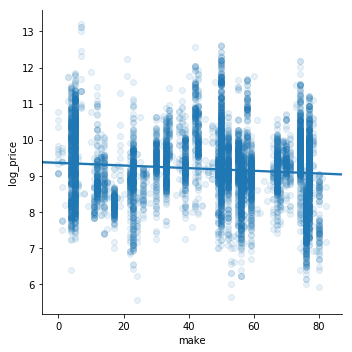

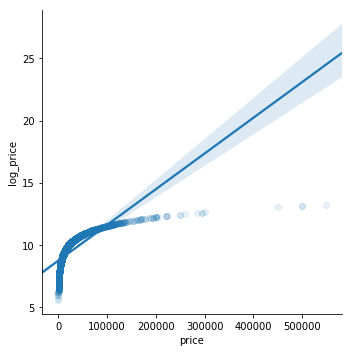

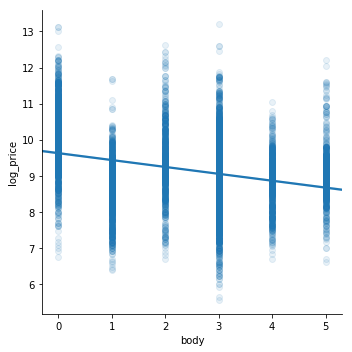

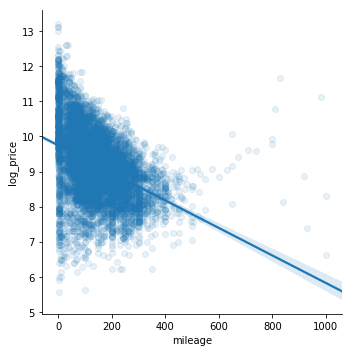

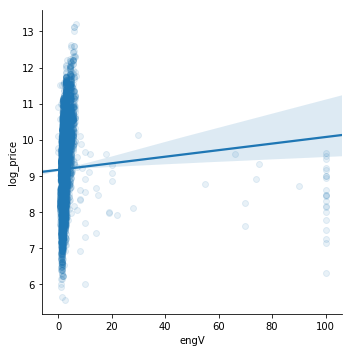

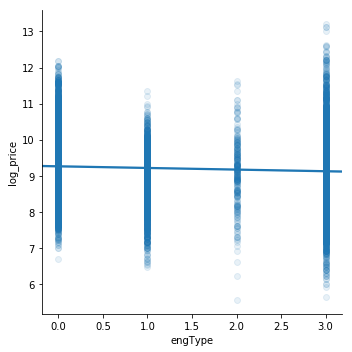

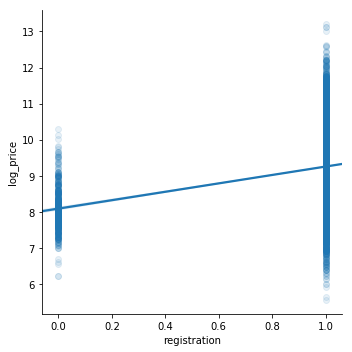

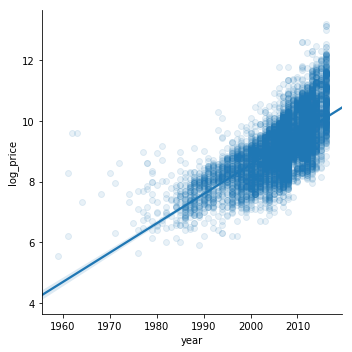

In [44]:
log_price = 'log_price'
features_graph = df.columns.drop(log_price)
n = 0
for feature in features:
    sns.lmplot(x=features_graph[n], y=log_price, data=df, scatter_kws=dict(alpha=0.1))
    plt.show()
    n += 1

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

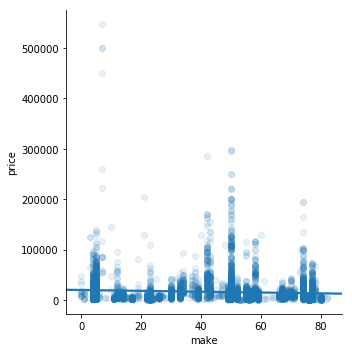

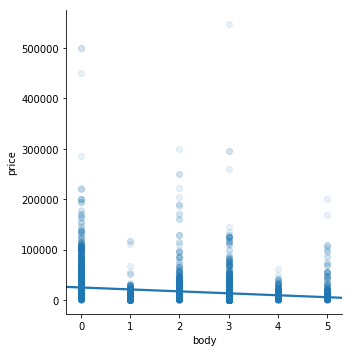

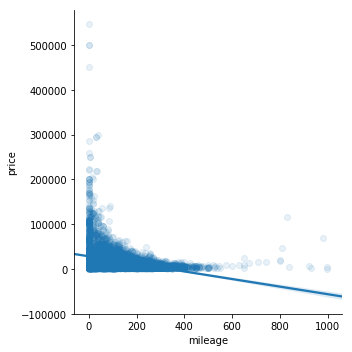

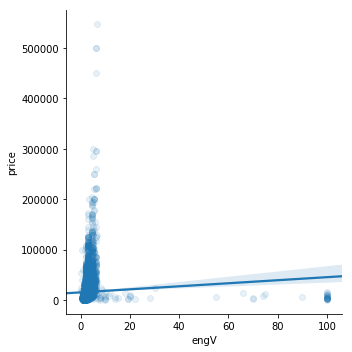

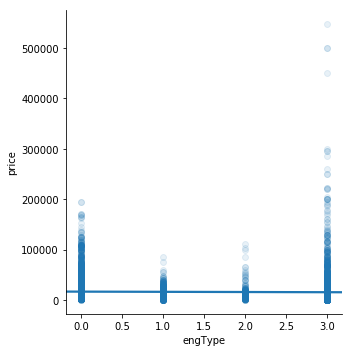

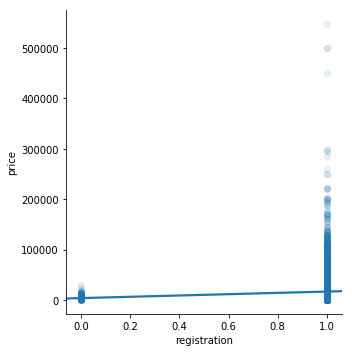

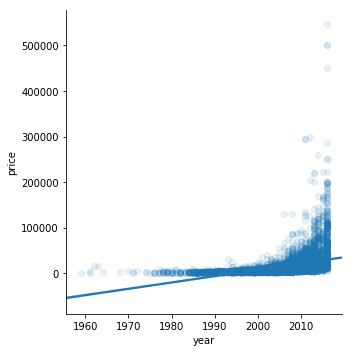

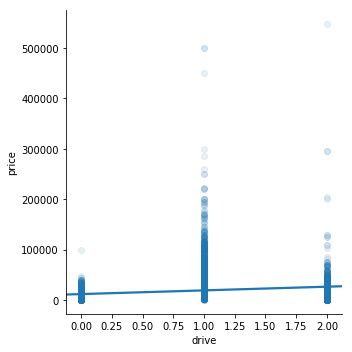

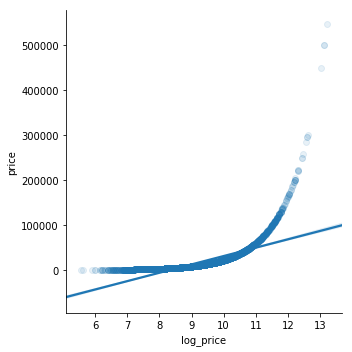

In [45]:
# Visualizing without the distraction of log_price
# A simple modification of the above code-cell

graph_target = 'price'
features_graph = df.columns.drop(graph_target)
n = 0
for feature in features_graph:
    sns.lmplot(x=features_graph[n], y=graph_target, data=df, scatter_kws=dict(alpha=0.1))
    plt.show()
    n += 1

Year has a nice curve to it.

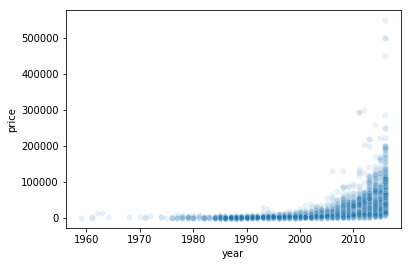

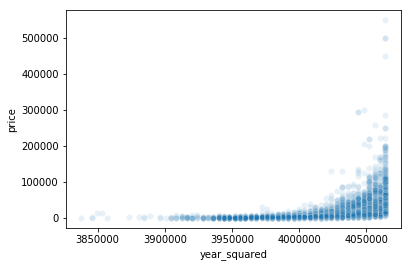

In [46]:
df['year_squared'] = df['year']**2
for feature in ['year', 'year_squared']:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

I also want to create a polynomial feature from mileage

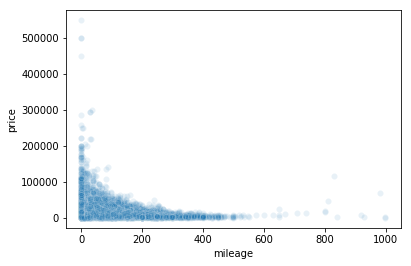

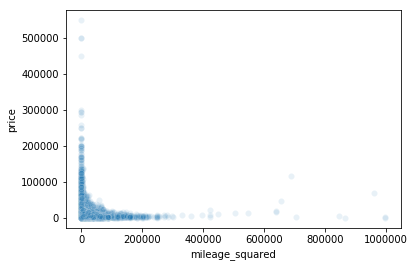

In [47]:
df['mileage_squared'] = df['mileage']**2
for feature in ['mileage', 'mileage_squared']:
    sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
    plt.show()

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [48]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,log_price,year_squared,mileage_squared
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100,4624
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121,29929
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064,18225
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144,26244
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169,6889


In [0]:
features = ['make', 
            'body', 'engV', 'engType', 'registration', 'drive', 'year_squared', 'mileage_squared']

target = 'log_price'

X = df[features]
y = df[target]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
print(model.intercept_)
print(model.coef_)

-88.8758500002336
[-1.50495071e-03 -9.52284793e-02  8.58920851e-03 -5.51013283e-02
  7.36769065e-01  3.89106975e-01  2.42128241e-05  4.63369157e-07]


In [0]:
y_pred = model.predict(X_test)

In [54]:
# Compare predictions to test target
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print('Root Mean Squared Error', rmse)
print('R^2 Score', r2)

Root Mean Squared Error 0.5842280191417994
R^2 Score 0.643848952042321



Needs improvement, but far, far better than our previous attempt!

In [55]:
pd.Series(model.coef_, features)

make              -1.504951e-03
body              -9.522848e-02
engV               8.589209e-03
engType           -5.510133e-02
registration       7.367691e-01
drive              3.891070e-01
year_squared       2.421282e-05
mileage_squared    4.633692e-07
dtype: float64

## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

We interprect our coefficients in terms of percentages, rather than raw value increases or decreases in the feature-target relationship (as in OLS)

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [56]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,log_price,year_squared,mileage_squared
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100,4624
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121,29929
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064,18225
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144,26244
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169,6889


R^2 Score Train 0.5353719821251918


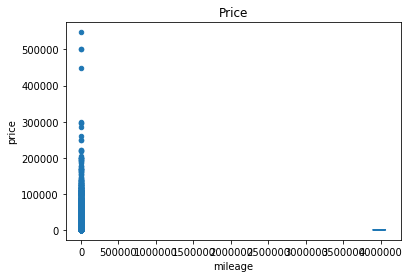

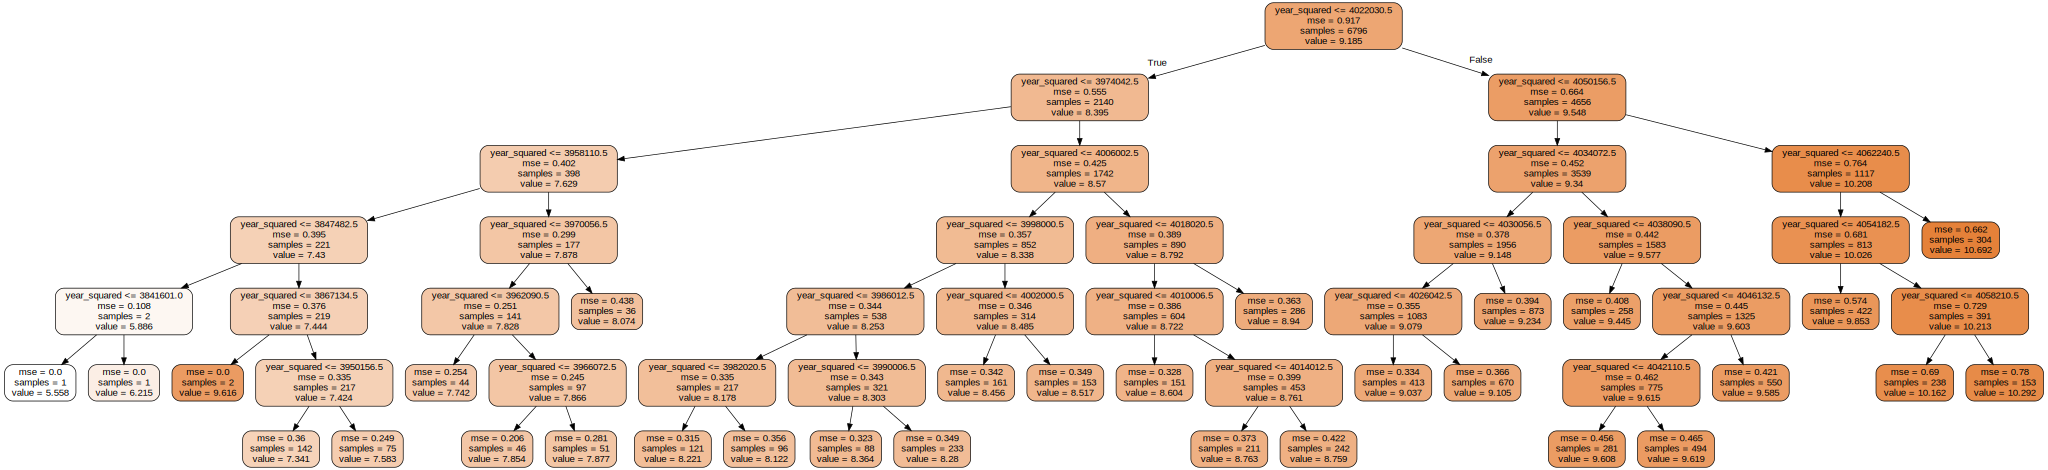

In [57]:
%matplotlib inline
import graphviz
from IPython.display import display
import matplotlib.pyplot as plt
from ipywidgets import interact
from mpl_toolkits import mplot3d
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

features = ['year_squared']

target = 'log_price'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)
def viztree(decision_tree, feature_names):
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)
tree = DecisionTreeRegressor(max_depth=6)
tree.fit(X_train, y_train)
print('R^2 Score Train', tree.score(X_train, y_train))

r2_score = tree.score(X_test, y_test)
ax = df.plot('mileage', 'price', kind='scatter', title='Price')
ax.step(X_train, tree.predict(X_train), where='mid')
plt.show()
display(viztree(tree, feature_names=['year_squared']))

#interact(mileage_tree, max_depth=(1,6,1));

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [58]:
print('R^2 Score Test', tree.score(X_test, y_test))

R^2 Score Test 0.5159973626622258


# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [59]:
import statsmodels.api as sm


X = df[['make', 
            'body', 'engV', 'engType', 'registration', 'drive', 'year_squared', 'mileage_squared']] 

y = df['log_price']

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.810e+05
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        18:21:42   Log-Likelihood:                -9906.7
No. Observations:                8495   AIC:                         1.983e+04
Df Residuals:                    8487   BIC:                         1.989e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
make               -0.0035      0.000     

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const              27250.913167
make                   1.057807
body                   1.129077
engV                   1.008765
engType                1.106583
registration           1.082842
drive                  1.131377
year_squared           1.284841
mileage_squared        1.254223
dtype: float64

It seems that we do. The condition number, as reported in the statsmodel regrression, is 1.77e+07

We seem to have many VIFs greater than 10. If I had more time, I'd adjust some of the earlier models by dropping some features to account for this.
